# 4. Übungsblatt DSAI

## 1. The experiment shows that the average monthly electricity consumption for a house is 458 units. The study records a total of 3206 units of electricity consumption. Calculate the duration of the experiment. Also, identify the criteria to calculate the median consumption.

In [10]:
import statistics

print(3206 / 458, 'months')

print(statistics.median([458]), 'units')
print('Median = (n + 1) / 2')

7.0 months
458 units
Median = (n + 1) / 2


## 2. Consider the wages (in dollars) of 15 workers:
## wage = [247, 228, 352, 298, 345, 312, 300, 285, 246, 352, 297, 304, 265, 325, 276]
## Find the wage above which 65% of wages would lie.

In [11]:
import numpy as np

wage = [247, 228, 352, 298, 345, 312, 300, 285, 246, 352, 297, 304, 265, 325, 276]
print('65% of wages are above:', np.percentile(wage, 65), 'dollars')

65% of wages are above: 304.8 dollars


## 3. Jimmy requires 38 minutes on average, with a standard deviation of 5 minutes to distribute the newspapers. On the other hand, Richard requires 27 minutes on average, with a standard deviation of 6 minutes to distribute the newspapers. Identify most consistent distributor. Hint: Use the coefficient of variation (σ/µ)

In [1]:
jimmy_avg = 38
jimmy_std = 5

richard_avg = 27
richard_std = 6

print('Jimmy:', (jimmy_std / jimmy_avg))
print('Richard:', (richard_std / richard_avg))

Jimmy: 0.13157894736842105
Richard: 0.2222222222222222


## 4. Identify the extreme weights from the bodyfat dataset using the interquartile (IQR = IQ3 -IQ1) range.

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/bodyfat.csv')

weights = df['Weight']

Q1 = np.percentile(weights, 25)
Q3 = np.percentile(weights, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (weights < lower_bound) | (weights > upper_bound)

print('Extreme Weights: \n', df[outliers])

Extreme Weights: 
     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
38   1.0202     35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3   
40   1.0217     34.5   45  262.75   68.75  43.2  128.3    126.2  125.6   72.5   

    Knee  Ankle  Biceps  Forearm  Wrist  
38  49.1   29.6    45.0     29.0   21.4  
40  39.6   26.6    36.4     32.7   21.4  


## 5. A car showroom in Ohio exhibits a total of 12 cars of different brands. Consider the prices (in dollars) for 12 cars as given below:
## price = [14751, 16422, 15398, 9445, 12589, 11687, 10692, 8475, 11184, 9961, 12898, 11905]
## Identify the type of skewness in the showroom prices of cars. (Pears2nd = 3(mean-median)/std)

In [32]:
import numpy as np

price = [14751, 16422, 15398, 9445, 12589, 11687, 10692, 8475, 11184, 9961, 12898, 11905]

mean_price = np.mean(price)
median_price = np.median(price)
std_price = np.std(price)

pears2nd = 3*(mean_price-median_price)/std_price

if pears2nd > 0:
    skewness_type = "positively skewed"
elif pears2nd < 0:
    skewness_type = "negatively skewed"
else:
    skewness_type = "symmetric"
    
print("Pears2nd: ",pears2nd)
print("The showroom prices of the cars are ",skewness_type,".")

Pears2nd:  0.41329390884304773
The showroom prices of the cars are  positively skewed .


## 6. A company offers its customers to take a vehicle and an eduacational loan. A study shows that the probability that a customer takes a vehicle loan is 0.35, the probability that a customer takes an educational loan is 0.46 and the probability that a customer takes at least one of the loan is 0.59. Find the probability that a customer takes both vehicle and educational loans. (Use: P(A AND B) = . . .)

In [3]:
cus_vehicle_loan = 0.35
cus_educ_loan = 0.46
cus_one_loan = cus_vehicle_loan + cus_educ_loan - (cus_vehicle_loan * cus_educ_loan)
cus_both_loans = cus_vehicle_loan * cus_educ_loan

print('At least one of the loan:', cus_one_loan)
print('Both of the loans:', cus_both_loans)

At least one of the loan: 0.649
Both of the loans: 0.161


## 7. The probabilities that a machine will produce 2, 5, 7, 9 defective batteries in a day are 0.3, 0.22, 0.15, 0.1 respectively. Find the expected number of defective batteries produced in a day

In [33]:
defective_counts = [2, 5, 7, 9]
probabilities = [0.3, 0.22, 0.15, 0.1]

expected_value = sum(p*x for p, x in zip(probabilities, defective_counts))

print(f"The expected number of defective batteries produced in a day is: {expected_value}")

The expected number of defective batteries produced in a day is: 3.65


## 8. From the experience, it is seen that 4% of the tyres produced by the machine are defective. Out of the 10 tyres produced, find the probability that at most 3 are defective.

In [52]:
from scipy.stats import binom

p_defective = 0.04

n_trials = 10

probability = sum(binom.pmf(k, n_trials, p_defective) for k in range(3))
print("The probability that at most 3 out of 10 tires are defective is: ", probability)

The probability that at most 3 out of 10 tires are defective is:  0.9937862840081287


## 9. The number of trucks crossing a bridge during the day follow a Poisson distribution with mean 18. What is the probability that on a randomly selected day 12 trucks would have crossed the bridge? Consider an random variable that follows normal distribution with mean 5 and variance 10 obtain:
## a : P(X < 1), b : P(X > 5), c : P(3 < X < 7)

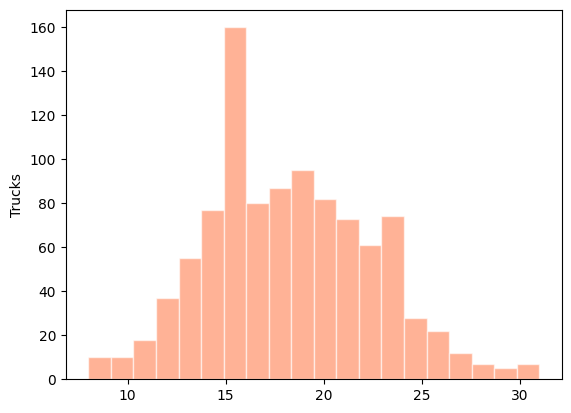

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

sample = stats.poisson.rvs(18, size=1000)
pd.Series(sample).plot.hist(bins=20, color = "coral", ec="white", alpha=0.6, label ='Trucks')
plt.ylabel('Trucks')
plt.show()

## 10. Consider the data given below. Can we claim that the average number of fruits on a tree is 70?
## number_fruits = [64, 56, 48, 56, 79, 67, 65, 86, 87, 53, 67, 89, 65, 42, 46]

In [31]:
import numpy as np

number_fruits = [64, 56, 48, 56, 79, 67, 65, 86, 87, 53, 67, 89, 65, 42, 46]

avg = np.average(number_fruits)
if avg == 70:
    print("yes")
else:
    print("no")
print("Average: ", avg)

no
Average:  64.66666666666667


## 11. Differences in TVnews Time between Clinton and Dole: Is there a hint, that there is a difference in TV news consumption between Clinton and Dole votes?